# Minimal OpenSCM-Runner example with FaIR

Requires fair >= 1.6.0a3 and < 2.0.0

In [1]:
import openscm_runner

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler
/nfs/b0110/Users/mencsm/openscm-runner/src/openscm_runner/run.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
File doesn't exist 


In [2]:
# NBVAL_IGNORE_OUTPUT
print(openscm_runner.__version__)

0.1.0+24.g40811fa.dirty


In [3]:
import os.path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyam
from fair.forward import fair_scm
from fair.tools.scmdf import scmdf_to_emissions
from scmdata import ScmDataFrame
from tqdm import tqdm_notebook

from openscm_runner.run import run
from openscm_runner.adapters import FAIR

In [4]:
fair = FAIR()

In [5]:
fair.get_version()

'1.6.0a5+9.g639bdd1'

In [6]:
# NBVAL_IGNORE_OUTPUT
df_fair = ScmDataFrame(
    os.path.join(
        "..", "tests", "test-data", "rcmip_scen_ssp_world_emissions.csv"
    )
)
#pd.options.display.max_rows = 999
df_fair.head()

/nfs/b0110/Users/mencsm/miniconda3/envs/test-ca/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: ScmDataFrame has been deprecated and will be removed in v0.6.0. Use the ScmRun class instead
  after removing the cwd from sys.path.


time                                                        2015-01-01 00:00:00  \
model         scenario region variable         unit                               
AIM/CGE       ssp370   World  Emissions|BC     Mt BC/yr                9.727424   
                              Emissions|C2F6   kt C2F6/yr              1.570000   
                              Emissions|C6F14  kt C6F14/yr             0.350000   
                              Emissions|CF4    kt CF4/yr              10.869900   
                              Emissions|CH4    Mt CH4/yr             388.072796   
...                                                                         ...   
REMIND-MAGPIE ssp585   World  Emissions|NOx    Mt NOx/yr             155.520450   
                              Emissions|OC     Mt OC/yr               34.746024   
                              Emissions|SF6    kt SF6/yr               8.020000   
                              Emissions|Sulfur Mt SO2/yr             100.771167   
                              Emissions|VOC    Mt VOC/yr             227.244819   

time                                                        2020-01-01 00:00:00  \
model         scenario region variable         unit                               
AIM/CGE       ssp370   World  Emissions|BC     Mt BC/yr               10.227893   
                              Emissions|C2F6   kt C2F6/yr              2.018300   
                              Emissions|C6F14  kt C6F14/yr             0.449891   
                              Emissions|CF4    kt CF4/yr              12.751283   
                              Emissions|CH4    Mt CH4/yr             418.454212   
...                                                                         ...   
REMIND-MAGPIE ssp585   World  Emissions|NOx    Mt NOx/yr             162.672435   
                              Emissions|OC     Mt OC/yr               30.932089   
                              Emissions|SF6    kt SF6/yr               8.412700   
                              Emissions|Sulfur Mt SO2/yr              80.150813   
                              Emissions|VOC    Mt VOC/yr             229.234177   

time                                                        2030-01-01 00:00:00  \
model         scenario region variable         unit                               
AIM/CGE       ssp370   World  Emissions|BC     Mt BC/yr               10.687554   
                              Emissions|C2F6   kt C2F6/yr              1.357400   
                              Emissions|C6F14  kt C6F14/yr             0.302626   
                              Emissions|CF4    kt CF4/yr              10.327405   
                              Emissions|CH4    Mt CH4/yr             471.330793   
...                                                                         ...   
REMIND-MAGPIE ssp585   World  Emissions|NOx    Mt NOx/yr             162.370049   
                              Emissions|OC     Mt OC/yr               24.403396   
                              Emissions|SF6    kt SF6/yr               9.293900   
                              Emissions|Sulfur Mt SO2/yr              71.509490   
                              Emissions|VOC    Mt VOC/yr             218.806256   

time                                                        2040-01-01 00:00:00  \
model         scenario region variable         unit                               
AIM/CGE       ssp370   World  Emissions|BC     Mt BC/yr               11.006388   
                              Emissions|C2F6   kt C2F6/yr              0.934400   
                              Emissions|C6F14  kt C6F14/yr             0.208315   
                              Emissions|CF4    kt CF4/yr               8.776119   
                              Emissions|CH4    Mt CH4/yr             515.545705   
...                                                                         ...   
REMIND-MAGPIE ssp585   World  Emissions|NOx    Mt NOx/yr             169.625596   
             

In [7]:
# NBVAL_IGNORE_OUTPUT
x = run(
    climate_models_cfgs={
        "FAIR": [
            {}
        ],  # passing an empty list of an empty dict will run with defaults
    },
    scenarios=df_fair,
    output_variables=(
        "Surface Temperature", 
        "Atmospheric Concentrations|CO2",
        "Effective Radiative Forcing",
        "Effective Radiative Forcing|CO2",
        "Effective Radiative Forcing|Aerosols",
        "Effective Radiative Forcing|Aerosols|Direct Effect",
        "Effective Radiative Forcing|Aerosols|Indirect Effect",
        "Effective Radiative Forcing|Contrails"
    ),
)

In [8]:
# NBVAL_IGNORE_OUTPUT
x.timeseries()

time                                                                                                                        1765-01-01  \
model         scenario                  region variable                              unit   climate_model           run_id               
AIM/CGE       ssp370                    World  Atmospheric Concentrations|CO2        ppm    FaIRv1.6.0a5+9.g639bdd1 3       278.051522   
              ssp370-lowNTCF-aerchemmip World  Atmospheric Concentrations|CO2        ppm    FaIRv1.6.0a5+9.g639bdd1 4       278.051522   
              ssp370-lowNTCF-gidden     World  Atmospheric Concentrations|CO2        ppm    FaIRv1.6.0a5+9.g639bdd1 5       278.051522   
              ssp370                    World  Effective Radiative Forcing           W/m**2 FaIRv1.6.0a5+9.g639bdd1 3         0.046695   
              ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing           W/m**2 FaIRv1.6.0a5+9.g639bdd1 4         0.046695   
...                                                                                                                                ...   
REMIND-MAGPIE ssp585                    World  Effective Radiative Forcing|CO2       W/m**2 FaIRv1.6.0a5+9.g639bdd1 9         0.000959   
              ssp534-over               World  Effective Radiative Forcing|Contrails W/m**2 FaIRv1.6.0a5+9.g639bdd1 8         0.000000   
              ssp585                    World  Effective Radiative Forcing|Contrails W/m**2 FaIRv1.6.0a5+9.g639bdd1 9         0.000000   
              ssp534-over               World  Surface Temperature                   K      FaIRv1.6.0a5+9.g639bdd1 8         0.005043   
              ssp585                    World  Surface Temperature                   K      FaIRv1.6.0a5+9.g639bdd1 9         0.005043   

time                                                                                                                        1766-01-01  \
model         scenario                  region variable                              unit   climate_model           run_id               
AIM/CGE       ssp370                    World  Atmospheric Concentrations|CO2        ppm    FaIRv1.6.0a5+9.g639bdd1 3       278.068497   
              ssp370-lowNTCF-aerchemmip World  Atmospheric Concentrations|CO2        ppm    FaIRv1.6.0a5+9.g639bdd1 4       278.068497   
              ssp370-lowNTCF-gidden     World  Atmospheric Concentrations|CO2        ppm    FaIRv1.6.0a5+9.g639bdd1 5       278.068497   
              ssp370                    World  Effective Radiative Forcing           W/m**2 FaIRv1.6.0a5+9.g639bdd1 3         0.071496   
              ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing           W/m**2 FaIRv1.6.0a5+9.g639bdd1 4         0.071496   
...                                                                                                                                ...   
REMIND-MAGPIE ssp585                    World  Effective Radiative Forcing|CO2       W/m**2 FaIRv1.6.0a5+9.g639bdd1 9         0.001275   
              ssp534-over               World  Effective Radiative Forcing|Contrails W/m**2 FaIRv1.6.0a5+9.g639bdd1 8         0.000000   
              ssp585                    World  Effective Radiative Forcing|Contrails W/m**2 FaIRv1.6.0a5+9.g639bdd1 9         0.000000   
              ssp534-over               World  Surface Temperature                   K      FaIRv1.6.0a5+9.g639bdd1 8         0.010373   
              ssp585                    World  Surface Temperature                   K      FaIRv1.6.0a5+9.g639bdd1 9         0.010373   

time                                                                                                                        1767-01-01  \
model         scenario                  region variable                              unit   climate_model           run_id               
AIM/CGE       ssp370                    World  Atmospheric Concentrations|CO2        ppm    FaIRv1.6.0a5+9.g639bdd1 3       278.102345

Note in the plots below that 'model' is the IAM that produced the scenario. In all cases, the climate model is FaIR.

In [9]:
x.get_unique_meta("climate_model", no_duplicates=True)

'FaIRv1.6.0a5+9.g639bdd1'

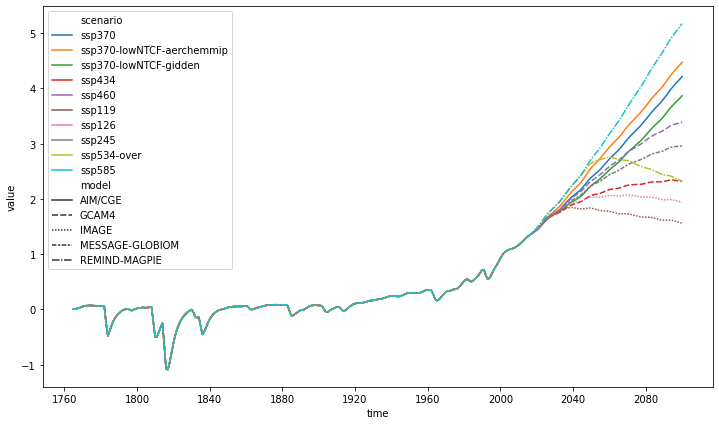

In [10]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Surface Temperature").lineplot(
    hue="scenario", style="model", ax=ax
)

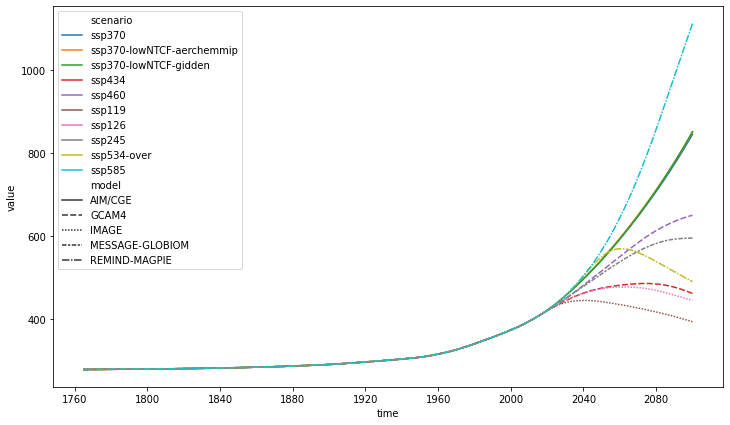

In [11]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Atmospheric Concentrations|CO2").lineplot(
    hue="scenario", style="model", ax=ax
)

@chrisroadmap: The ssp245 historical emissions are very much non-zero in the past (plot below), which might be causing your aerosol routine to explode?

@zebedeen: problem was nonsense default values for the hacked aerosol scheme.

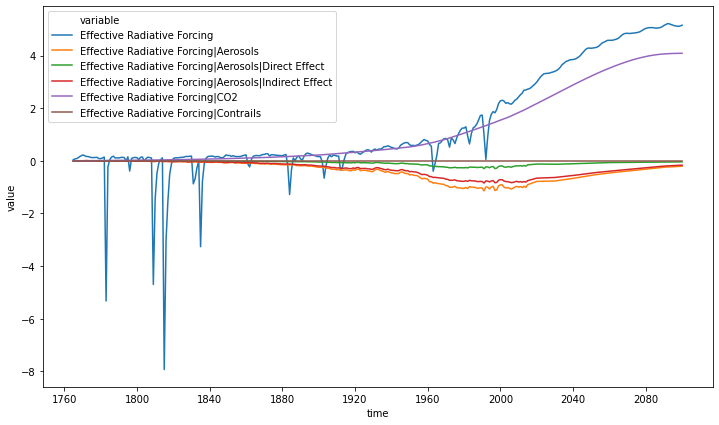

In [12]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Effective Radiative Forcing*", scenario="ssp245").lineplot(
    hue="variable", ax=ax
)

In [13]:
rcmip_hist_emms = ScmDataFrame("rcmip-emissions-annual-means-4-0-0-ssp-only.csv")

/nfs/b0110/Users/mencsm/miniconda3/envs/test-ca/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: ScmDataFrame has been deprecated and will be removed in v0.6.0. Use the ScmRun class instead
  """Entry point for launching an IPython kernel.


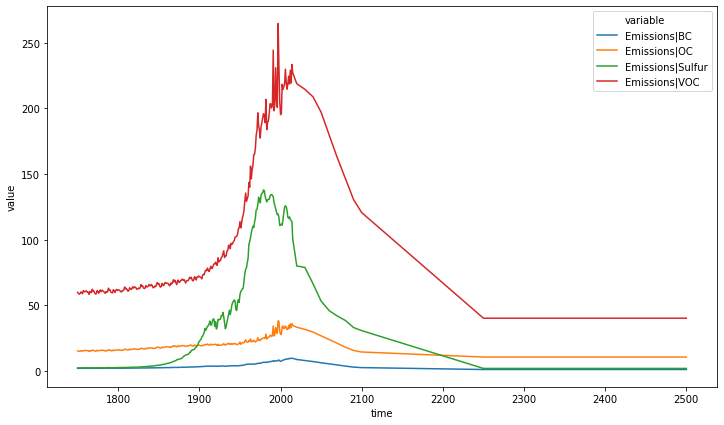

In [14]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
rcmip_hist_emms.filter(
    scenario="ssp245", 
    region="World", 
    variable=["*BC", "*Sulfur", "*OC"]
).lineplot(hue="variable", ax=ax)